In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, Normalizer
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from os import path

In [2]:
datos = pd.read_csv("20220617_NEM_PERCENTILES_JOVENES_2021_20220530_PUBL.csv", sep=";")

In [3]:
datos

,RBD,COD_DEPE,AGNO_EGRESO,MRUN,NEM,PERCENTIL,PUESTO_10,PUESTO_30
0,8424,1,2021,122,"5,78",30,NO,SI
1,2200,4,2021,163,"6,85",20,NO,SI
2,40023,4,2021,164,"6,53",40,NO,NO
3,8923,4,2021,429,"6,7",60,NO,NO
4,10500,3,2021,488,"5,3",60,NO,NO
...,...,...,...,...,...,...,...,...
207697,286,1,2021,27072968,"6,2",10,SI,NO
207698,109,1,2021,27072971,"5,03",90,NO,NO
207699,106,5,2021,27072972,"5,33",80,NO,NO
207700,11831,1,2021,27072973,"6,08",20,NO,SI


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207702 entries, 0 to 207701
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   RBD          207702 non-null  int64 
 1   COD_DEPE     207702 non-null  int64 
 2   AGNO_EGRESO  207702 non-null  int64 
 3   MRUN         207702 non-null  int64 
 4   NEM          207702 non-null  object
 5   PERCENTIL    207702 non-null  int64 
 6   PUESTO_10    207702 non-null  object
 7   PUESTO_30    207702 non-null  object
dtypes: int64(5), object(3)
memory usage: 12.7+ MB


In [5]:
datos["RBD"] = datos["RBD"].astype("category")
datos["NEM"] = datos["NEM"].str.replace(",",".")
datos["NEM"] = datos["NEM"].astype(np.float64)


In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207702 entries, 0 to 207701
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   RBD          207702 non-null  category
 1   COD_DEPE     207702 non-null  int64   
 2   AGNO_EGRESO  207702 non-null  int64   
 3   MRUN         207702 non-null  int64   
 4   NEM          207702 non-null  float64 
 5   PERCENTIL    207702 non-null  int64   
 6   PUESTO_10    207702 non-null  object  
 7   PUESTO_30    207702 non-null  object  
dtypes: category(1), float64(1), int64(4), object(2)
memory usage: 11.6+ MB


In [7]:
agrupacion_promedios = datos.groupby(by = "RBD").mean().reset_index()

In [8]:
directorio = pd.read_csv("Directorio_Oficial_EE_2021.csv", sep=";")

In [9]:
directorio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16498 entries, 0 to 16497
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   AGNO            16498 non-null  int64 
 1   RBD             16498 non-null  int64 
 2   DGV_RBD         16498 non-null  int64 
 3   NOM_RBD         16468 non-null  object
 4   MRUN            16498 non-null  object
 5   RUT_SOSTENEDOR  16498 non-null  object
 6   P_JURIDICA      16498 non-null  int64 
 7   COD_REG_RBD     16498 non-null  int64 
 8   NOM_REG_RBD_A   16498 non-null  object
 9   COD_PRO_RBD     16498 non-null  int64 
 10  COD_COM_RBD     16498 non-null  int64 
 11  NOM_COM_RBD     16498 non-null  object
 12  COD_DEPROV_RBD  16498 non-null  int64 
 13  NOM_DEPROV_RBD  16498 non-null  object
 14  COD_DEPE        16498 non-null  int64 
 15  COD_DEPE2       16498 non-null  int64 
 16  RURAL_RBD       16498 non-null  int64 
 17  LATITUD         16498 non-null  object
 18  LONGIT

In [10]:
directorio = directorio[directorio["NOM_RBD"].str.contains("JARDIN+|SALA CUNA+", regex=True) == False]

In [11]:
directorio["LONGITUD"] = directorio["LONGITUD"].replace(" ", np.nan)
directorio["LATITUD"] = directorio["LATITUD"].replace(" ", np.nan)
directorio.dropna()
directorio["LONGITUD"] = directorio["LONGITUD"].str.replace(",",".").astype(np.float64)
directorio["LATITUD"] = directorio["LATITUD"].str.replace(",",".").astype(np.float64)


In [12]:
directorio

,AGNO,RBD,DGV_RBD,NOM_RBD,MRUN,RUT_SOSTENEDOR,P_JURIDICA,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,...,ENS_08,ENS_09,ENS_10,ENS_11,MATRICULA,ESTADO_ESTAB,ORI_RELIGIOSA,ORI_OTRO_GLOSA,PAGO_MATRICULA,PAGO_MENSUAL
0,2021,1,9,LICEO POLITECNICO ARICA,,62000660,1,15,AYP,151,...,0,0,0,0,1,1,2,,GRATUITO,GRATUITO
1,2021,2,7,PARVULARIO LAS ESPIGUITAS,,62000660,1,15,AYP,151,...,0,0,0,0,1,1,2,,GRATUITO,GRATUITO
2,2021,3,5,ESC. PEDRO VICENTE GUTIERREZ TORRES,,62000660,1,15,AYP,151,...,0,0,0,0,1,1,1,,GRATUITO,GRATUITO
3,2021,4,3,LICEO OCTAVIO PALMA PEREZ,,62000660,1,15,AYP,151,...,0,0,0,0,1,1,1,,GRATUITO,GRATUITO
4,2021,5,1,JOVINA NARANJO FERNANDEZ,,62000660,1,15,AYP,151,...,0,0,0,0,1,1,7,PLURALISTA,GRATUITO,GRATUITO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16485,2021,41911,7,ESCUELA DE LENGUAJE RUCAKUYÉN,,65095013,1,8,BBIO,81,...,0,0,0,0,0,1,9,,SIN INFORMACION,SIN INFORMACION
16489,2021,41916,8,ESCUELA HOSPITALARIA SAN ANTONIO,,65142404,1,5,VALPO,56,...,0,0,0,0,0,1,1,,SIN INFORMACION,SIN INFORMACION
16490,2021,41917,6,ESCUELA HOSPITALARIA SAN FRANCISCO,,65193679,1,5,VALPO,57,...,0,0,0,0,0,1,9,,GRATUITO,GRATUITO
16492,2021,41919,2,COLEGIO HODGKINSON,,53334410,1,6,LGBO,61,...,0,0,0,0,0,1,9,,SIN INFORMACION,SIN INFORMACION


In [13]:
localizaciones = gpd.GeoDataFrame(directorio, geometry= gpd.points_from_xy(directorio["LONGITUD"], directorio["LATITUD"]), crs=4326)

In [14]:
localizaciones.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 15584 entries, 0 to 16495
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   AGNO            15584 non-null  int64   
 1   RBD             15584 non-null  int64   
 2   DGV_RBD         15584 non-null  int64   
 3   NOM_RBD         15584 non-null  object  
 4   MRUN            15584 non-null  object  
 5   RUT_SOSTENEDOR  15584 non-null  object  
 6   P_JURIDICA      15584 non-null  int64   
 7   COD_REG_RBD     15584 non-null  int64   
 8   NOM_REG_RBD_A   15584 non-null  object  
 9   COD_PRO_RBD     15584 non-null  int64   
 10  COD_COM_RBD     15584 non-null  int64   
 11  NOM_COM_RBD     15584 non-null  object  
 12  COD_DEPROV_RBD  15584 non-null  int64   
 13  NOM_DEPROV_RBD  15584 non-null  object  
 14  COD_DEPE        15584 non-null  int64   
 15  COD_DEPE2       15584 non-null  int64   
 16  RURAL_RBD       15584 non-null  int64   
 17  LATI

In [15]:
conjunto = localizaciones.merge(agrupacion_promedios, how = "left", on = "RBD")

In [16]:
conjunto

,AGNO,RBD,DGV_RBD,NOM_RBD,MRUN_x,RUT_SOSTENEDOR,P_JURIDICA,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,...,ORI_RELIGIOSA,ORI_OTRO_GLOSA,PAGO_MATRICULA,PAGO_MENSUAL,geometry,COD_DEPE_y,AGNO_EGRESO,MRUN_y,NEM,PERCENTIL
0,2021,1,9,LICEO POLITECNICO ARICA,,62000660,1,15,AYP,151,...,2,,GRATUITO,GRATUITO,POINT (-70.29521 -18.48720),6.0,2021.0,1.425397e+07,5.488641,49.514563
1,2021,2,7,PARVULARIO LAS ESPIGUITAS,,62000660,1,15,AYP,151,...,2,,GRATUITO,GRATUITO,POINT (-70.30276 -18.46986),NaN,NaN,NaN,NaN,NaN
2,2021,3,5,ESC. PEDRO VICENTE GUTIERREZ TORRES,,62000660,1,15,AYP,151,...,1,,GRATUITO,GRATUITO,POINT (-70.26083 -18.50358),NaN,NaN,NaN,NaN,NaN
3,2021,4,3,LICEO OCTAVIO PALMA PEREZ,,62000660,1,15,AYP,151,...,1,,GRATUITO,GRATUITO,POINT (-70.30827 -18.47424),6.0,2021.0,1.288946e+07,6.200546,54.117647
4,2021,5,1,JOVINA NARANJO FERNANDEZ,,62000660,1,15,AYP,151,...,7,PLURALISTA,GRATUITO,GRATUITO,POINT (-70.31345 -18.47690),6.0,2021.0,1.313688e+07,6.240480,54.240000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15579,2021,41911,7,ESCUELA DE LENGUAJE RUCAKUYÉN,,65095013,1,8,BBIO,81,...,9,,SIN INFORMACION,SIN INFORMACION,POINT (-73.10757 -36.78845),NaN,NaN,NaN,NaN,NaN
15580,2021,41916,8,ESCUELA HOSPITALARIA SAN ANTONIO,,65142404,1,5,VALPO,56,...,1,,SIN INFORMACION,SIN INFORMACION,POINT (-70.77424 -33.50808),NaN,NaN,NaN,NaN,NaN
15581,2021,41917,6,ESCUELA HOSPITALARIA SAN FRANCISCO,,65193679,1,5,VALPO,57,...,9,,GRATUITO,GRATUITO,POINT EMPTY,NaN,NaN,NaN,NaN,NaN
15582,2021,41919,2,COLEGIO HODGKINSON,,53334410,1,6,LGBO,61,...,9,,SIN INFORMACION,SIN INFORMACION,POINT EMPTY,NaN,NaN,NaN,NaN,NaN


In [17]:
conjunto.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 15584 entries, 0 to 15583
Data columns (total 43 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   AGNO            15584 non-null  int64   
 1   RBD             15584 non-null  object  
 2   DGV_RBD         15584 non-null  int64   
 3   NOM_RBD         15584 non-null  object  
 4   MRUN_x          15584 non-null  object  
 5   RUT_SOSTENEDOR  15584 non-null  object  
 6   P_JURIDICA      15584 non-null  int64   
 7   COD_REG_RBD     15584 non-null  int64   
 8   NOM_REG_RBD_A   15584 non-null  object  
 9   COD_PRO_RBD     15584 non-null  int64   
 10  COD_COM_RBD     15584 non-null  int64   
 11  NOM_COM_RBD     15584 non-null  object  
 12  COD_DEPROV_RBD  15584 non-null  int64   
 13  NOM_DEPROV_RBD  15584 non-null  object  
 14  COD_DEPE_x      15584 non-null  int64   
 15  COD_DEPE2       15584 non-null  int64   
 16  RURAL_RBD       15584 non-null  int64   
 17  LATI

In [18]:
conjunto.columns

Index(['AGNO', 'RBD', 'DGV_RBD', 'NOM_RBD', 'MRUN_x', 'RUT_SOSTENEDOR',
       'P_JURIDICA', 'COD_REG_RBD', 'NOM_REG_RBD_A', 'COD_PRO_RBD',
       'COD_COM_RBD', 'NOM_COM_RBD', 'COD_DEPROV_RBD', 'NOM_DEPROV_RBD',
       'COD_DEPE_x', 'COD_DEPE2', 'RURAL_RBD', 'LATITUD', 'LONGITUD',
       'CONVENIO_PIE', 'ENS_01', 'ENS_02', 'ENS_03', 'ENS_04', 'ENS_05',
       'ENS_06', 'ENS_07', 'ENS_08', 'ENS_09', 'ENS_10', 'ENS_11', 'MATRICULA',
       'ESTADO_ESTAB', 'ORI_RELIGIOSA', 'ORI_OTRO_GLOSA', 'PAGO_MATRICULA',
       'PAGO_MENSUAL', 'geometry', 'COD_DEPE_y', 'AGNO_EGRESO', 'MRUN_y',
       'NEM', 'PERCENTIL'],
      dtype='object')

In [19]:
datos_compacto_2021 = conjunto[['AGNO', 'RBD', 'NOM_RBD', 'COD_REG_RBD', 'COD_PRO_RBD', 'COD_COM_RBD', 'NOM_COM_RBD', "COD_DEPE2", 'NEM', 'geometry']]

In [20]:
datos_compacto_2021 = datos_compacto_2021[datos_compacto_2021["geometry"] != None]
datos_compacto_2021

,AGNO,RBD,NOM_RBD,COD_REG_RBD,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,COD_DEPE2,NEM,geometry
0,2021,1,LICEO POLITECNICO ARICA,15,151,15101,ARICA,5,5.488641,POINT (-70.29521 -18.48720)
1,2021,2,PARVULARIO LAS ESPIGUITAS,15,151,15101,ARICA,5,NaN,POINT (-70.30276 -18.46986)
2,2021,3,ESC. PEDRO VICENTE GUTIERREZ TORRES,15,151,15101,ARICA,5,NaN,POINT (-70.26083 -18.50358)
3,2021,4,LICEO OCTAVIO PALMA PEREZ,15,151,15101,ARICA,5,6.200546,POINT (-70.30827 -18.47424)
4,2021,5,JOVINA NARANJO FERNANDEZ,15,151,15101,ARICA,5,6.240480,POINT (-70.31345 -18.47690)
...,...,...,...,...,...,...,...,...,...,...
15579,2021,41911,ESCUELA DE LENGUAJE RUCAKUYÉN,8,81,8112,HUALPÉN,2,NaN,POINT (-73.10757 -36.78845)
15580,2021,41916,ESCUELA HOSPITALARIA SAN ANTONIO,5,56,5601,SAN ANTONIO,2,NaN,POINT (-70.77424 -33.50808)
15581,2021,41917,ESCUELA HOSPITALARIA SAN FRANCISCO,5,57,5703,LLAILLAY,2,NaN,POINT EMPTY
15582,2021,41919,COLEGIO HODGKINSON,6,61,6106,GRANEROS,2,NaN,POINT EMPTY


Text(0.5, 1.0, 'Grafica de distribución de escuelas en Chile')

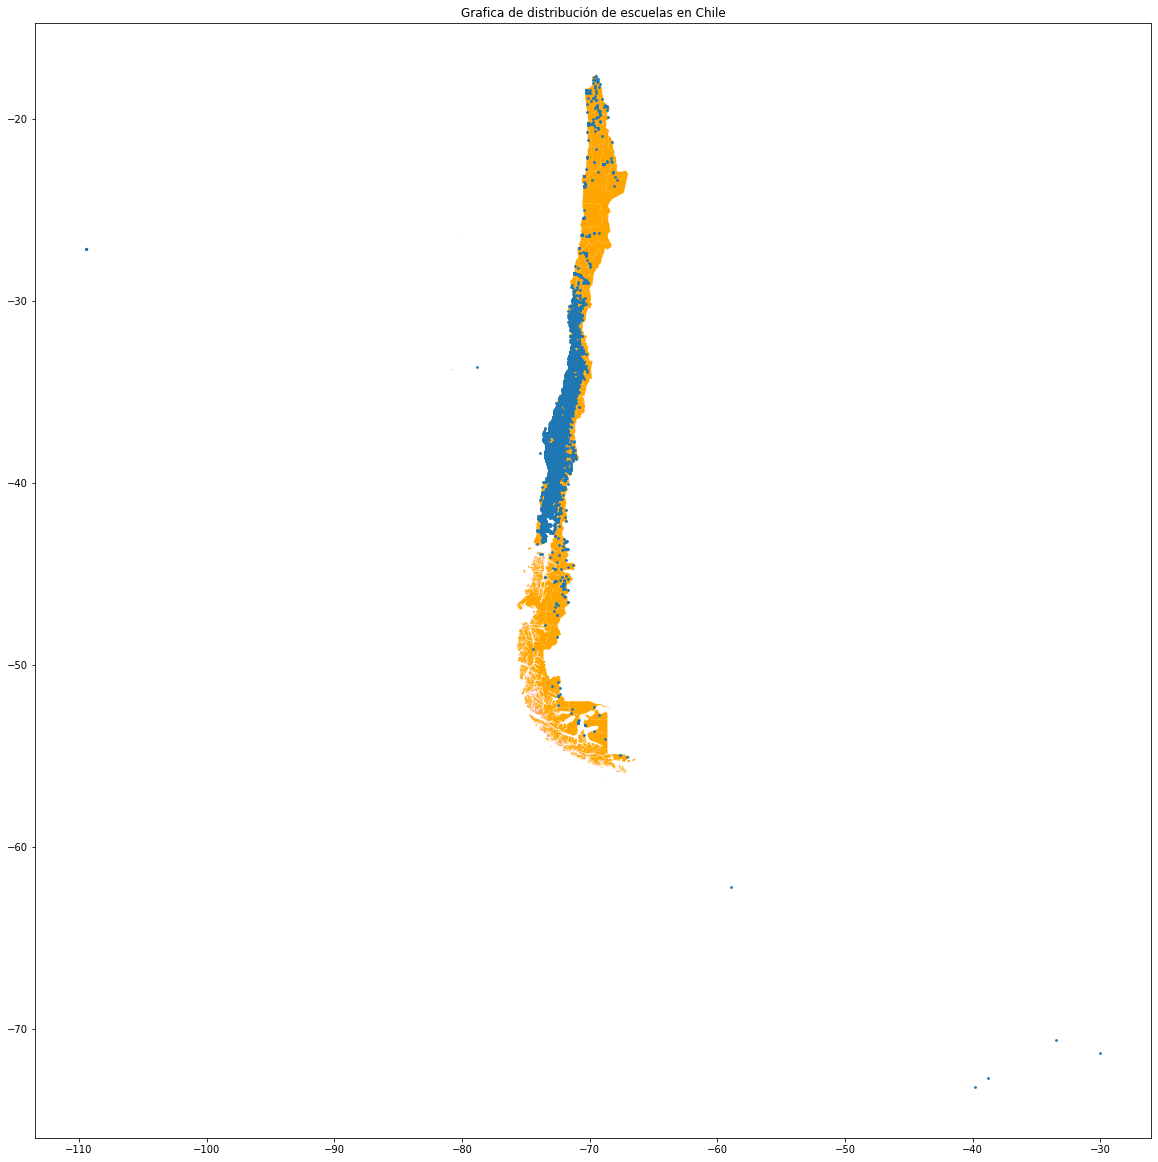

In [21]:
ruta_cartografia = path.join("DivisionPoliticoAdministrativa2020", "COMUNA", "COMUNAS_2020.shp")
comunas = gpd.read_file(ruta_cartografia).to_crs(4326)
# y ploteamos los datos del geodataframe
plot_mapa = comunas.plot(color = "orange", figsize=(20, 50))
datos_compacto_2021.plot(ax = plot_mapa, markersize=3)
plot_mapa.set_title("Grafica de distribución de escuelas en Chile")

In [22]:
geometry = datos_compacto_2021[["RBD", "NOM_RBD", "geometry"]]

In [23]:
geometry[geometry["geometry"].isnull() == False]

,RBD,NOM_RBD,geometry
0,1,LICEO POLITECNICO ARICA,POINT (-70.29521 -18.48720)
1,2,PARVULARIO LAS ESPIGUITAS,POINT (-70.30276 -18.46986)
2,3,ESC. PEDRO VICENTE GUTIERREZ TORRES,POINT (-70.26083 -18.50358)
3,4,LICEO OCTAVIO PALMA PEREZ,POINT (-70.30827 -18.47424)
4,5,JOVINA NARANJO FERNANDEZ,POINT (-70.31345 -18.47690)
...,...,...,...
15579,41911,ESCUELA DE LENGUAJE RUCAKUYÉN,POINT (-73.10757 -36.78845)
15580,41916,ESCUELA HOSPITALARIA SAN ANTONIO,POINT (-70.77424 -33.50808)
15581,41917,ESCUELA HOSPITALARIA SAN FRANCISCO,POINT EMPTY
15582,41919,COLEGIO HODGKINSON,POINT EMPTY


In [24]:
datos_compacto_2021.drop("geometry", axis = 1, inplace=True)

##### Apertura de datos para agregar al dataframe

In [25]:
subencion = pd.read_csv("20220509_Detalle Subvenciones 2021_20220413.csv", sep=";", encoding="ISO-8859-1")

In [26]:
ingreso = pd.read_csv("Ingresos_medios_2010-2021.csv", sep=",")

In [27]:
resumen_docente = pd.read_csv("Dotacion_docente_2021.csv", sep=";")[["RBD", "NOM_RBD", "DC_TOT"]]

In [28]:
evaluacion = pd.read_csv("20201104_SNED_2020_2021.csv", sep=";")[["RBD", "NOM_RBD", "EFECTIVR", "MEJORAR", "IGUALDR"]]

In [29]:
subencion = subencion.groupby("NOM_RBD").mean().reset_index()
subencion.drop(["AGNO", "COD_REG_RBD", "COD_PRO_RBD", "COD_COM_RBD"], axis = 1, inplace = True)

In [30]:
subencion["RBD"] = subencion["RBD"].astype(np.int64)

In [31]:
ingreso = ingreso[ingreso["agno"] == 2021]

In [32]:
ingreso.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 187 to 203
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   agno         17 non-null     int64  
 1   region       17 non-null     int64  
 2   ingre_medio  17 non-null     float64
 3   inter_inf    17 non-null     float64
 4   inter_sup    17 non-null     float64
 5   calidad      17 non-null     object 
dtypes: float64(3), int64(2), object(1)
memory usage: 952.0+ bytes


In [33]:
evaluacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10780 entries, 0 to 10779
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   RBD       10780 non-null  int64 
 1   NOM_RBD   10780 non-null  object
 2   EFECTIVR  10780 non-null  object
 3   MEJORAR   10780 non-null  object
 4   IGUALDR   10780 non-null  object
dtypes: int64(1), object(4)
memory usage: 421.2+ KB


In [34]:
evaluacion.replace(" ", 0, inplace=True)

In [35]:

evaluacion["EFECTIVR"]= evaluacion["EFECTIVR"].str.replace(",",".").astype(np.float64)
evaluacion["MEJORAR"] = evaluacion["MEJORAR"].str.replace(",",".").astype(np.float64)
evaluacion["IGUALDR"]= evaluacion["IGUALDR"].str.replace(",",".").astype(np.float64)


In [36]:
ingreso.rename(columns={"region":"COD_REG_RBD"}, inplace = True)

In [37]:
ingreso = ingreso[["COD_REG_RBD", "ingre_medio"]]

In [38]:
datos_compacto_2021 = datos_compacto_2021.merge(subencion, how="left", on = ["RBD", "NOM_RBD"])

In [39]:
datos_compacto_2021 = datos_compacto_2021.merge(ingreso, how="left", on = "COD_REG_RBD")

In [40]:
datos_compacto_2021 = datos_compacto_2021.merge(resumen_docente, how="left", on = ["RBD", "NOM_RBD"])

In [41]:
datos_compacto_2021 = datos_compacto_2021.merge(evaluacion, how="left", on = ["RBD", "NOM_RBD"])

###### Limpieza de datos para el cluster kmeans

In [42]:
datos_compacto_2021 = datos_compacto_2021.dropna()

In [43]:
datos_compacto_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2137 entries, 0 to 15422
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AGNO                     2137 non-null   int64  
 1   RBD                      2137 non-null   object 
 2   NOM_RBD                  2137 non-null   object 
 3   COD_REG_RBD              2137 non-null   int64  
 4   COD_PRO_RBD              2137 non-null   int64  
 5   COD_COM_RBD              2137 non-null   int64  
 6   NOM_COM_RBD              2137 non-null   object 
 7   COD_DEPE2_x              2137 non-null   int64  
 8   NEM                      2137 non-null   float64
 9   rut_sostenedor           2137 non-null   float64
 10  COD_DEPROV_RBD           2137 non-null   float64
 11  COD_DEPE                 2137 non-null   float64
 12  COD_DEPE2_y              2137 non-null   float64
 13  RURAL_RBD                2137 non-null   float64
 14  mes                    

In [44]:
datos_compacto_2021 = datos_compacto_2021[['AGNO', 'RBD', 'NOM_RBD', 'COD_REG_RBD', 'COD_PRO_RBD', 'COD_COM_RBD', 'NOM_COM_RBD', 'COD_DEPE2_x', 'NEM', "subv_normal", "ingre_medio", "DC_TOT", "EFECTIVR", "MEJORAR", "IGUALDR"]]

In [45]:
scaler = StandardScaler()
data_sc = scaler.fit_transform(datos_compacto_2021[["AGNO", "COD_DEPE2_x", "NEM", "subv_normal", "ingre_medio", "DC_TOT", "EFECTIVR", "MEJORAR", "IGUALDR"]])
data_sc

array([[ 0.        ,  3.60672325, -1.21043745, ..., -1.76859159,
         0.22618629, -1.56164603],
       [ 0.        ,  3.60672325,  1.58920348, ...,  0.4447285 ,
         0.22618629,  0.6931764 ],
       [ 0.        ,  3.60672325,  1.74624716, ...,  0.61641518,
         0.22618629,  0.59000204],
       ...,
       [ 0.        ,  0.17554611, -0.57587581, ..., -0.43055254,
        -8.4310098 , -0.18901465],
       [ 0.        ,  0.17554611, -1.30996155, ..., -0.79779742,
         0.22618629,  0.1638244 ],
       [ 0.        ,  0.17554611, -3.05341521, ...,  0.38103614,
         0.22618629,  0.2482032 ]])

In [46]:
inertia=[]
kmax=20
for i in range(1,kmax):

    kmeans = KMeans(n_clusters=i,n_init=10)
    kncl= kmeans.fit(data_sc)

    print(i,kncl.inertia_)
    inertia.append(kncl.inertia_)

1 17095.999999999996
2 13847.285137327834
3 12206.713775643042
4 10619.291699638603
5 9573.289633855056
6 8122.850193882028
7 7142.707267902372
8 6506.95748542936
9 6135.263095226264
10 5817.763122468762
11 5540.583800096149
12 5311.202015053094
13 5081.594020702076
14 4879.75023863753
15 4732.896408578366
16 4589.353669672953
17 4439.203690709693
18 4359.460925585336
19 4235.044618308402


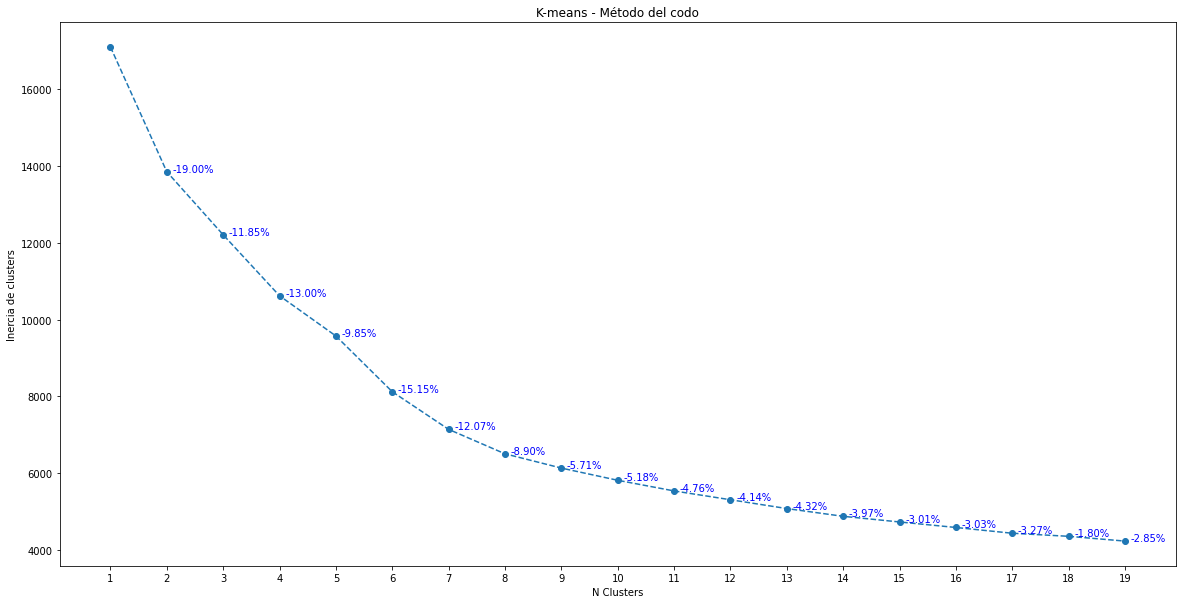

In [47]:
f, ax = plt.subplots(1,1, figsize=(20,10))

ax.plot(range(1,kmax),inertia,marker='o',ls='--')
ax.set_xlabel('N Clusters')
ax.set_ylabel('Inercia de clusters')
ax.set_title('K-means - Método del codo')

for i in range(1,len(inertia)):
    delta=(-inertia[i-1]+inertia[i])/inertia[i-1]*100
    ax.text(i+1.1,inertia[i],'%.2f'%delta+'%',color='b')
ax.set_xticks(range(1,kmax))

plt.show()

In [48]:
k=7

# Inicializamos la instancia  KMeans 
kmeans = KMeans(n_clusters=k,random_state=0)


# Correr el algoritmo sobre el conjunto de variable normalizadas
kcls = kmeans.fit(data_sc)


In [49]:
datos_compacto_2021['kcls_labels'] = kcls.labels_

In [50]:
centers = kcls.cluster_centers_
centers_i = scaler.inverse_transform(centers)

centers_i

array([[2.02100000e+03, 5.00000000e+00, 5.67674526e+00, 6.40535142e+07,
        6.16853659e+05, 4.78240741e+01, 3.36685885e+01, 9.98765432e+01,
        9.08350770e+01],
       [2.02100000e+03, 1.88316151e+00, 6.05041723e+00, 7.25190142e+07,
        6.34168179e+05, 4.45412371e+01, 5.26132638e+01, 9.98739977e+01,
        9.39352075e+01],
       [2.02100000e+03, 1.71428571e+00, 5.74248848e+00, 7.54197130e+07,
        6.51870462e+05, 4.73928571e+01, 3.93960022e+01, 9.82142857e+01,
        6.37565235e+01],
       [2.02100000e+03, 1.75593220e+00, 5.85126687e+00, 1.64467733e+08,
        6.89497804e+05, 8.78677966e+01, 4.79801636e+01, 9.98983051e+01,
        9.31317099e+01],
       [2.02100000e+03, 1.65075922e+00, 5.64180086e+00, 6.09929959e+07,
        7.79132492e+05, 4.04598698e+01, 3.65684634e+01, 9.98843095e+01,
        9.06692053e+01],
       [2.02100000e+03, 1.42833052e+00, 5.66719675e+00, 5.15355033e+07,
        5.70397726e+05, 3.84620573e+01, 3.51176880e+01, 9.98257448e+01,
        9.1

In [51]:
datos_compacto_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2137 entries, 0 to 15422
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGNO         2137 non-null   int64  
 1   RBD          2137 non-null   object 
 2   NOM_RBD      2137 non-null   object 
 3   COD_REG_RBD  2137 non-null   int64  
 4   COD_PRO_RBD  2137 non-null   int64  
 5   COD_COM_RBD  2137 non-null   int64  
 6   NOM_COM_RBD  2137 non-null   object 
 7   COD_DEPE2_x  2137 non-null   int64  
 8   NEM          2137 non-null   float64
 9   subv_normal  2137 non-null   float64
 10  ingre_medio  2137 non-null   float64
 11  DC_TOT       2137 non-null   float64
 12  EFECTIVR     2137 non-null   float64
 13  MEJORAR      2137 non-null   float64
 14  IGUALDR      2137 non-null   float64
 15  kcls_labels  2137 non-null   int32  
dtypes: float64(7), int32(1), int64(5), object(3)
memory usage: 275.5+ KB


In [52]:
datos_compacto_2021 = datos_compacto_2021.merge(geometry, on = ["RBD", "NOM_RBD"])


In [53]:
datos_compacto_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2137 entries, 0 to 15422
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   AGNO         2137 non-null   int64   
 1   RBD          2137 non-null   object  
 2   NOM_RBD      2137 non-null   object  
 3   COD_REG_RBD  2137 non-null   int64   
 4   COD_PRO_RBD  2137 non-null   int64   
 5   COD_COM_RBD  2137 non-null   int64   
 6   NOM_COM_RBD  2137 non-null   object  
 7   COD_DEPE2_x  2137 non-null   int64   
 8   NEM          2137 non-null   float64 
 9   subv_normal  2137 non-null   float64 
 10  ingre_medio  2137 non-null   float64 
 11  DC_TOT       2137 non-null   float64 
 12  EFECTIVR     2137 non-null   float64 
 13  MEJORAR      2137 non-null   float64 
 14  IGUALDR      2137 non-null   float64 
 15  kcls_labels  2137 non-null   int32   
 16  geometry     2137 non-null   geometry
dtypes: float64(7), geometry(1), int32(1), int64(5), object(3)
memory usage

In [54]:
datos_compacto_2021 = gpd.GeoDataFrame(datos_compacto_2021)

Text(0.5, 1.0, 'Grafica de distribución de escuelas en Chile')

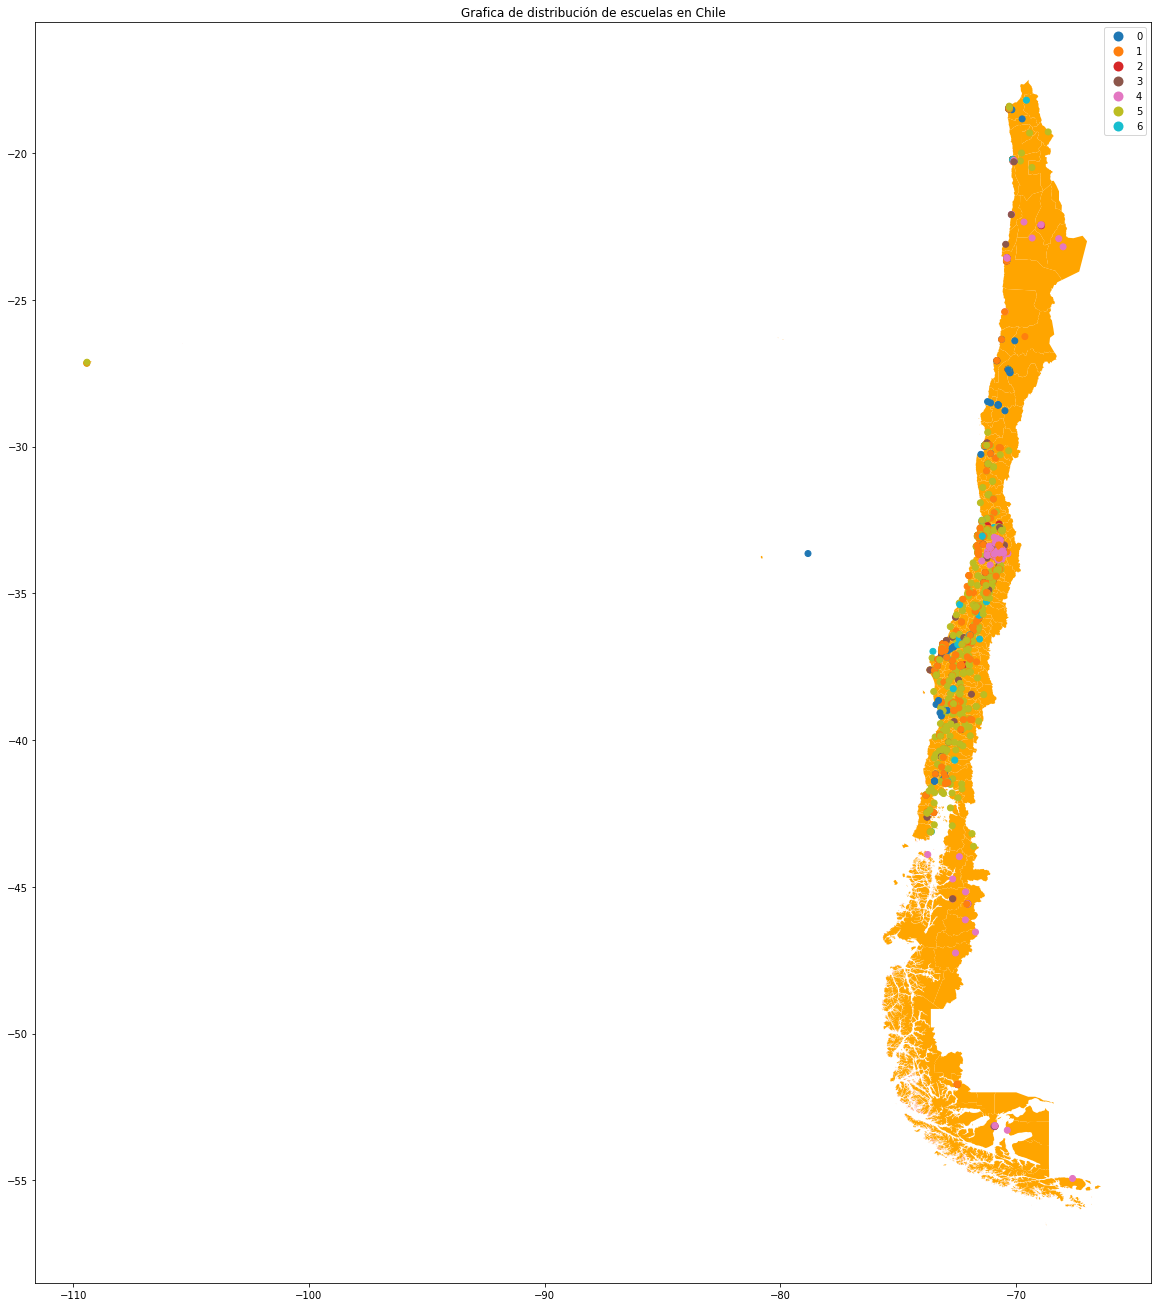

In [55]:
ruta_cartografia = path.join("DivisionPoliticoAdministrativa2020", "COMUNA", "COMUNAS_2020.shp")
comunas = gpd.read_file(ruta_cartografia).to_crs(4326)
# y ploteamos los datos del geodataframe
plot_mapa = comunas.plot(color = "orange", figsize=(20, 50))
datos_compacto_2021.plot(ax = plot_mapa, column = "kcls_labels", categorical = True, legend = True)
plot_mapa.set_title("Grafica de distribución de escuelas en Chile")



In [56]:
values = datos_compacto_2021.groupby(by = "kcls_labels").mean().sort_values(by="NEM")
datos_compacto_2021.groupby(by = "kcls_labels").mean().sort_values(by="NEM")[["AGNO", "COD_DEPE2_x", "NEM", "subv_normal", "ingre_medio", "DC_TOT", "EFECTIVR", "MEJORAR", "IGUALDR"]]

,AGNO,COD_DEPE2_x,NEM,subv_normal,ingre_medio,DC_TOT,EFECTIVR,MEJORAR,IGUALDR
kcls_labels,,,,,,,,,
4,2021.0,1.650000,5.641046,6.081395e+07,779129.619721,40.408696,36.586729,99.884058,90.671032
5,2021.0,1.428331,5.667197,5.153550e+07,570397.726161,38.462057,35.117688,99.825745,91.457801
0,2021.0,5.000000,5.676745,6.405351e+07,616853.658945,47.824074,33.668589,99.876543,90.835077
2,2021.0,1.714286,5.742488,7.541971e+07,651870.461616,47.392857,39.396002,98.214286,63.756524
6,2021.0,1.942857,5.773169,6.802887e+07,618522.723962,44.571429,41.520407,88.666667,91.907570
3,2021.0,1.756757,5.851732,1.643964e+08,689805.088003,87.787162,47.913225,99.898649,93.120551
1,2021.0,1.883162,6.050417,7.251901e+07,634168.179144,44.541237,52.613264,99.873998,93.935207


In [57]:
datos_compacto_2021

,AGNO,RBD,NOM_RBD,COD_REG_RBD,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,COD_DEPE2_x,NEM,subv_normal,ingre_medio,DC_TOT,EFECTIVR,MEJORAR,IGUALDR,kcls_labels,geometry
0,2021,1,LICEO POLITECNICO ARICA,15,151,15101,ARICA,5,5.488641,7.234019e+07,582645.934570,71.0,23.437452,100.0,85.135741,0,POINT (-70.29521 -18.48720)
3,2021,4,LICEO OCTAVIO PALMA PEREZ,15,151,15101,ARICA,5,6.200546,1.274158e+08,582645.934570,64.0,46.872478,100.0,94.777983,0,POINT (-70.30827 -18.47424)
4,2021,5,JOVINA NARANJO FERNANDEZ,15,151,15101,ARICA,5,6.240480,1.140461e+08,582645.934570,70.0,48.690327,100.0,94.336781,0,POINT (-70.31345 -18.47690)
5,2021,7,L. POLI. ANTONIO VARAS DE LA BARRA,15,151,15101,ARICA,5,5.617087,1.522742e+08,582645.934570,99.0,29.168294,100.0,92.306536,0,POINT (-70.28837 -18.47615)
6,2021,8,COLEGIO INTEGRADO EDUARDO FREI MONTALVA,15,151,15101,ARICA,5,5.612941,9.943901e+07,582645.934570,58.0,38.695490,100.0,91.764478,0,POINT (-70.31758 -18.48249)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15362,2021,40399,COLEGIO NAZARET,1,11,1107,ALTO HOSPICIO,2,5.865833,9.283357e+07,672108.633436,39.0,34.168429,100.0,91.874784,4,POINT (-70.09583 -20.24708)
15382,2021,40422,COLEGIO NIRVANA,1,11,1107,ALTO HOSPICIO,2,5.400976,2.139173e+08,672108.633436,59.0,36.057746,100.0,90.463984,3,POINT (-70.09471 -20.29335)
15392,2021,40436,COLEGIO DE LAS ARTES Y LETRAS BETHEL DE QUILPUE,5,58,5801,QUILPUÉ,2,5.650000,1.519898e+07,601402.313114,21.0,37.604847,80.0,91.005491,6,POINT (-71.43475 -33.04835)
15403,2021,40457,LICEO TECNICO PROFESIONAL PABLO NERUDA,10,102,10201,CASTRO,2,5.463333,2.780966e+07,552445.318850,19.0,33.716393,100.0,92.514328,5,POINT (-73.77352 -42.48280)
